In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering

data = tf.keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

num_images = 50000

# ####
# num_images = 20000
train_images = train_images[:num_images]
train_labels = train_labels[:num_images]
# ####

subset_num = int(0.6*num_images)

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

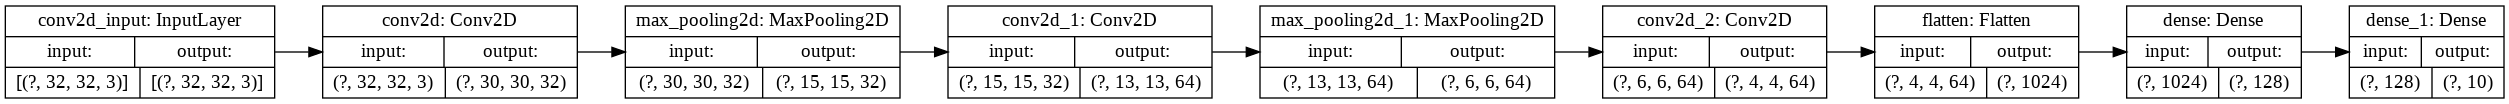

In [ ]:
from tensorflow.keras.utils import plot_model
keras_model = model
plot_model(keras_model, to_file='keras_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

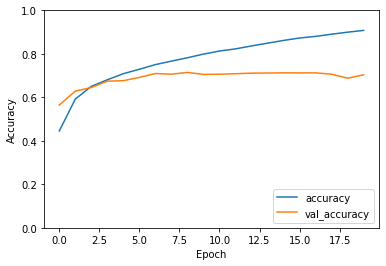

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs[6])
embedding = activation_model.predict(train_images)

In [ ]:
clustering = AgglomerativeClustering(n_clusters = subset_num).fit(embedding)

In [ ]:
centroid = []
for i in range(clustering.n_clusters_):
  centroid.append(embedding[clustering.labels_ == i].mean(axis=0))

indices = []
other_indices = {}

for i in range(clustering.n_clusters_):
  x = np.expand_dims(centroid[i], axis=0)
  points = embedding[clustering.labels_ == i]
  temp = np.where(clustering.labels_ == i)[0]
  dist, _ = np.array(pairwise_distances_argmin_min(x, points))
  indices.append(temp[int(dist)])

  list_redun = []
  for i in range(len(points)):
      if i != int(dist):
        list_redun.append(temp[i])
  
  other_indices[temp[int(dist)]] = list_redun

print(indices)
print(len(indices))
print(other_indices)


[788, 9410, 10386, 18950, 16329, 37603, 30072, 41937, 87, 19110, 42574, 15103, 35238, 43116, 49526, 5687, 31077, 31424, 23429, 4361, 7380, 30471, 34356, 39439, 41535, 9843, 15472, 11055, 33479, 40440, 22178, 29041, 33887, 46503, 10882, 11089, 45583, 1806, 5008, 2731, 20259, 2591, 9770, 41799, 12441, 15399, 15091, 41524, 8009, 10803, 23745, 43275, 26234, 31104, 20962, 24883, 21019, 1474, 43333, 40743, 505, 20942, 2497, 14851, 34756, 5810, 8396, 14375, 7779, 38524, 32766, 36232, 257, 43119, 27475, 13125, 30298, 19192, 10137, 2110, 3452, 4852, 9312, 7183, 11338, 13379, 28400, 19373, 28740, 19008, 4386, 22271, 14874, 23179, 36047, 9863, 9075, 19881, 11266, 14198, 4479, 30124, 27570, 9616, 25559, 27887, 33697, 26847, 49677, 14282, 42800, 5248, 28680, 9212, 35417, 20091, 1052, 36508, 18901, 23190, 12232, 1482, 46109, 33905, 43951, 15357, 36959, 23807, 35110, 7387, 15680, 6372, 3288, 25819, 34541, 4031, 29267, 16651, 6908, 12973, 19019, 33532, 25945, 13414, 18975, 22048, 19283, 6207, 13521, 1

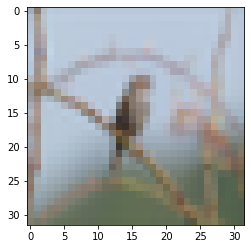

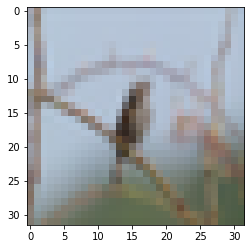

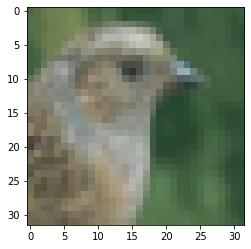

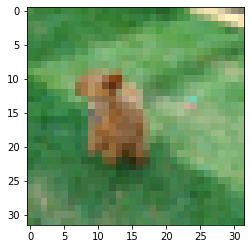

In [ ]:
plt.imshow(train_images[13506])
plt.show()
plt.imshow(train_images[19985])
plt.show()
plt.imshow(train_images[16050])
plt.show()
plt.imshow(train_images[1580])
plt.show()

In [ ]:
# Reduced subset
subset_train = np.zeros([subset_num, 32, 32, 3])
subset_train_labels = np.zeros([subset_num, 1])
for i in range(len(indices)):
  subset_train[i] = train_images[indices[i]]
  subset_train_labels[i] = train_labels[indices[i]]

In [ ]:
len(indices)

30000

In [ ]:
model_subset = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model_subset.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_subset = model_subset.fit(subset_train, subset_train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history_subset.history['accuracy'], label='accuracy')
plt.plot(history_subset.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
indices_np = np.array(indices)

In [ ]:
np.save('indices_agg', indices_np) 

In [ ]:
import time
X_subset = train_images
Y_subset = train_labels
W_subset = np.ones(len(X_subset))
ordering_time,similarity_time, pre_time = 0, 0, 0
loss_vec, acc_vec, time_vec = [], [], []
test_loss, test_acc, train_loss, train_acc = {}, {}, {}, {}
best_acc = 0

batch_size = 32
subset_size = .9
epochs = 15
reg = 1e-4

model_iter = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model_iter.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for epoch in range(0, epochs):
    print('Epoch {}/{}'.format(epoch, epochs - 1))
    num_batches = int(np.ceil(X_subset.shape[0] / float(batch_size)))

    for index in range(num_batches):
        X_batch = X_subset[index * batch_size:(index + 1) * batch_size]
        Y_batch = Y_subset[index * batch_size:(index + 1) * batch_size]
        W_batch = W_subset[index * batch_size:(index + 1) * batch_size]

        # start = time.time()
        history = model_iter.train_on_batch(X_batch, Y_batch, sample_weight=W_batch)
        # train_time[epoch] += time.time() - start
    
    layer_outputs = [layer.output for layer in model_iter.layers[:7]]
    activation_model = models.Model(inputs=model_iter.input, outputs=layer_outputs[6])
    embedding = activation_model.predict(train_images)

    clustering = AgglomerativeClustering(n_clusters = subset_num).fit(embedding)

    centroid = []
    for i in range(clustering.n_clusters_):
        centroid.append(embedding[clustering.labels_ == i].mean(axis=0))

    indices = []
    other_indices = {}

    for i in range(clustering.n_clusters_):
        x = np.expand_dims(centroid[i], axis=0)
        points = embedding[clustering.labels_ == i]
        temp = np.where(clustering.labels_ == i)[0]
        dist, _ = np.array(pairwise_distances_argmin_min(x, points))
        indices.append(temp[int(dist)])

    if epoch == epochs-1:
        np.save("final_subset.npz", indices)
    X_subset = train_images[indices, :]
    Y_subset = train_labels[indices]

    start = time.time()
    score = model_iter.evaluate(test_images, test_labels, verbose=1)
    eval_time = time.time()-start

    start = time.time()
    score_loss = model_iter.evaluate(train_images, train_labels, verbose=1)
    print(f'eval time on training: {time.time()-start}')

    test_loss[epoch], test_acc[epoch] = score[0], score[1]
    train_loss[epoch], train_acc[epoch] = score_loss[0], score_loss[1]
    best_acc = max(test_acc[epoch], best_acc)

    print(f'subset_size: {subset_size}, epoch: {epoch}, test_acc: {test_acc[epoch]}, '
              f'loss: {train_loss[epoch]}, best_prec1_gb: {best_acc}')

Epoch 0/14


In [ ]:
np.save("indices_agg", indices)

[0.4458000063896179, 0.5209000110626221, 0.5648000240325928, 0.5763000249862671, 0.5846999883651733, 0.6141999959945679, 0.6209999918937683, 0.6352999806404114, 0.6258000135421753, 0.616599977016449, 0.6464999914169312, 0.614300012588501, 0.6395000219345093, 0.6455000042915344, 0.6345999836921692]


(0.0, 1.0)

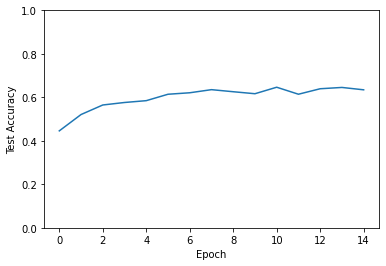

In [ ]:
validation_acc = []
for epoch in test_acc:
    validation_acc.append(test_acc[epoch])

print(validation_acc)

plt.plot(validation_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.ylim([0.0, 1])

In [ ]:
not_selected = [i for i in range(20000) if i not in indices]

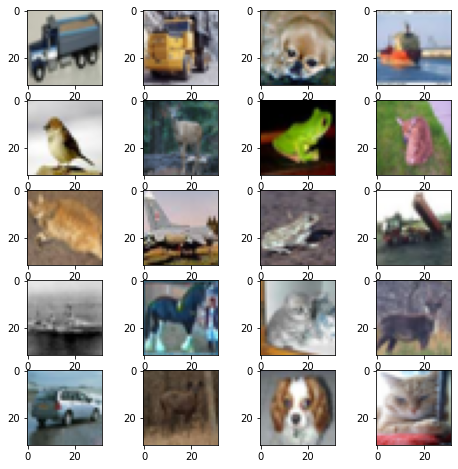

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    not_selected_img = np.random.randint(len(not_selected))
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[not_selected_img])
plt.show()

In [ ]:
len(indices)

16000